# DATA5000 Workshop #2 Notebook on Forecasting

# ***NeuralProphet:***

## https://neuralprophet.com/

# ***Presentation***
## https://github.com/ourownstory/neural_prophet/blob/main/notes/NeuralProphet_Introduction.pdf

### ***The research paper:***
## https://arxiv.org/abs/2111.15397

### ***Facebook Prophet***, which set an industry standard for explainable, scalable, and user-friendly forecasting frameworks: https://facebook.github.io/prophet/

### But Prophet is a statistical method - NOT a Neural Network-based Model

### ***Prophet*** also lacks understanding of "local context": which is essential for forecasting the near-term future.

### The lack of local context, which is essential for forecasting the nearterm future, has restricted the usefulness of Prophet in industrial applications.


### ***Readings***:

* https://towardsdatascience.com/in-depth-understanding-of-neuralprophet-through-a-complete-example-2474f675bc96

* https://towardsdatascience.com/prophet-vs-neuralprophet-fc717ab7a9d8


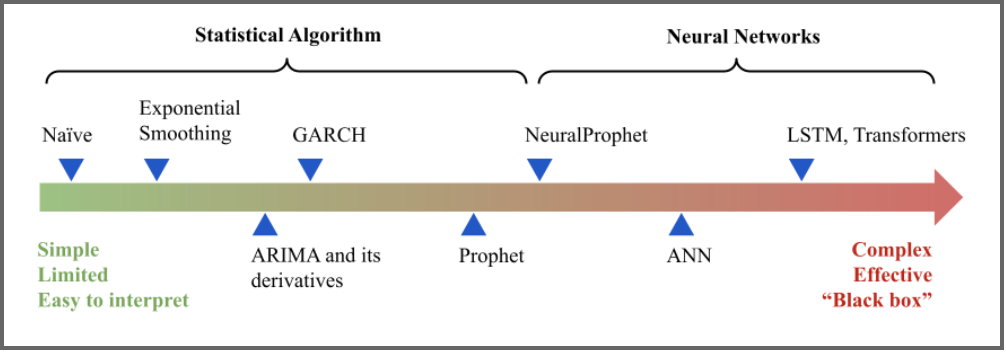

#***LOCAL CONTEXT***

### ***A local context is:*** the near-term future depends on the current state of the system. The majority of time series forecasting exhibits those dynamics, evidenced in scenarios related to energy consumption, traffic patterns, air quality measures, and much more. For example, when there’s a strong uptick in server load, it might have been triggered by a recent event that could continue for prolonged periods, which should be reflected in near-term forecasts.

### For short to medium-term forecasts, NeuralProphet improves forecast accuracy by 55 to 92 percent

## What is a Neural Network? https://www.ibm.com/cloud/learn/neural-networks

# ***TIME IN NEURAL PROPHET***
### Pandas Time Series: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

#***What is a Neural Network?***
## What is a Neural Network? https://www.ibm.com/cloud/learn/neural-networks

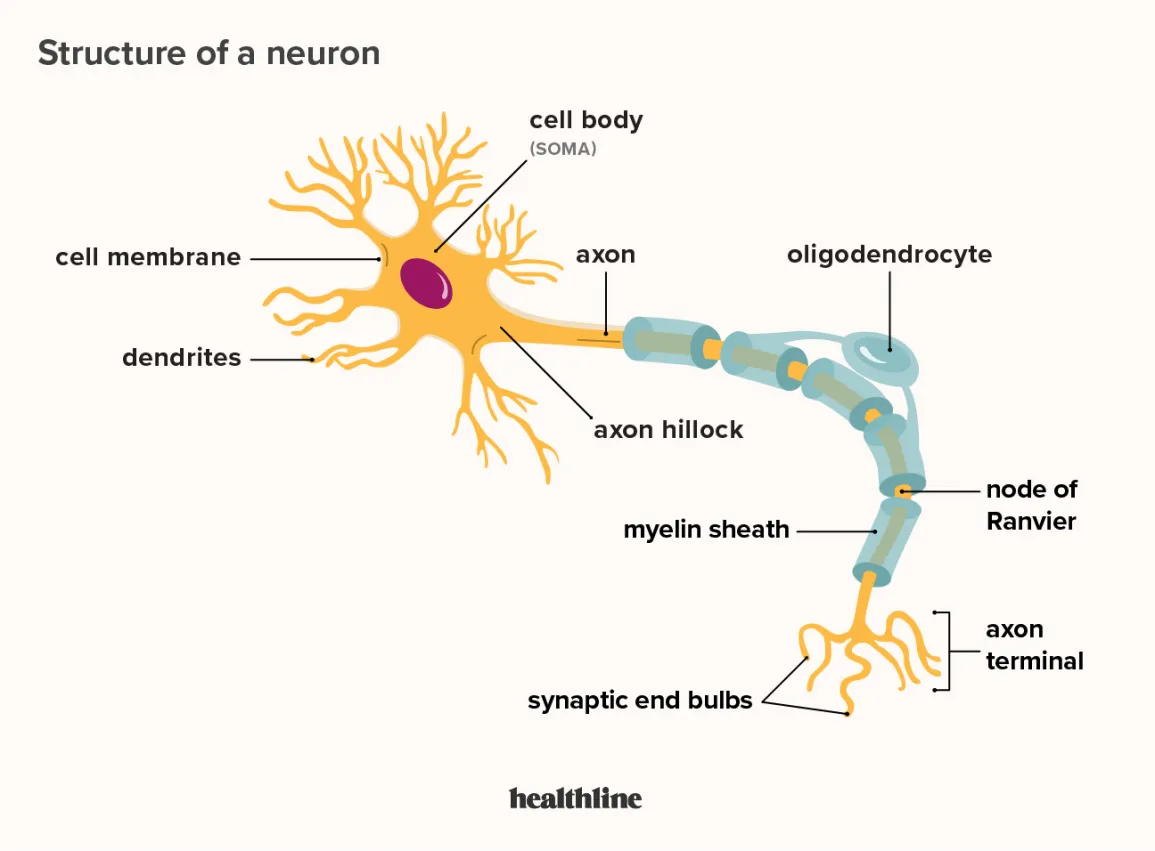

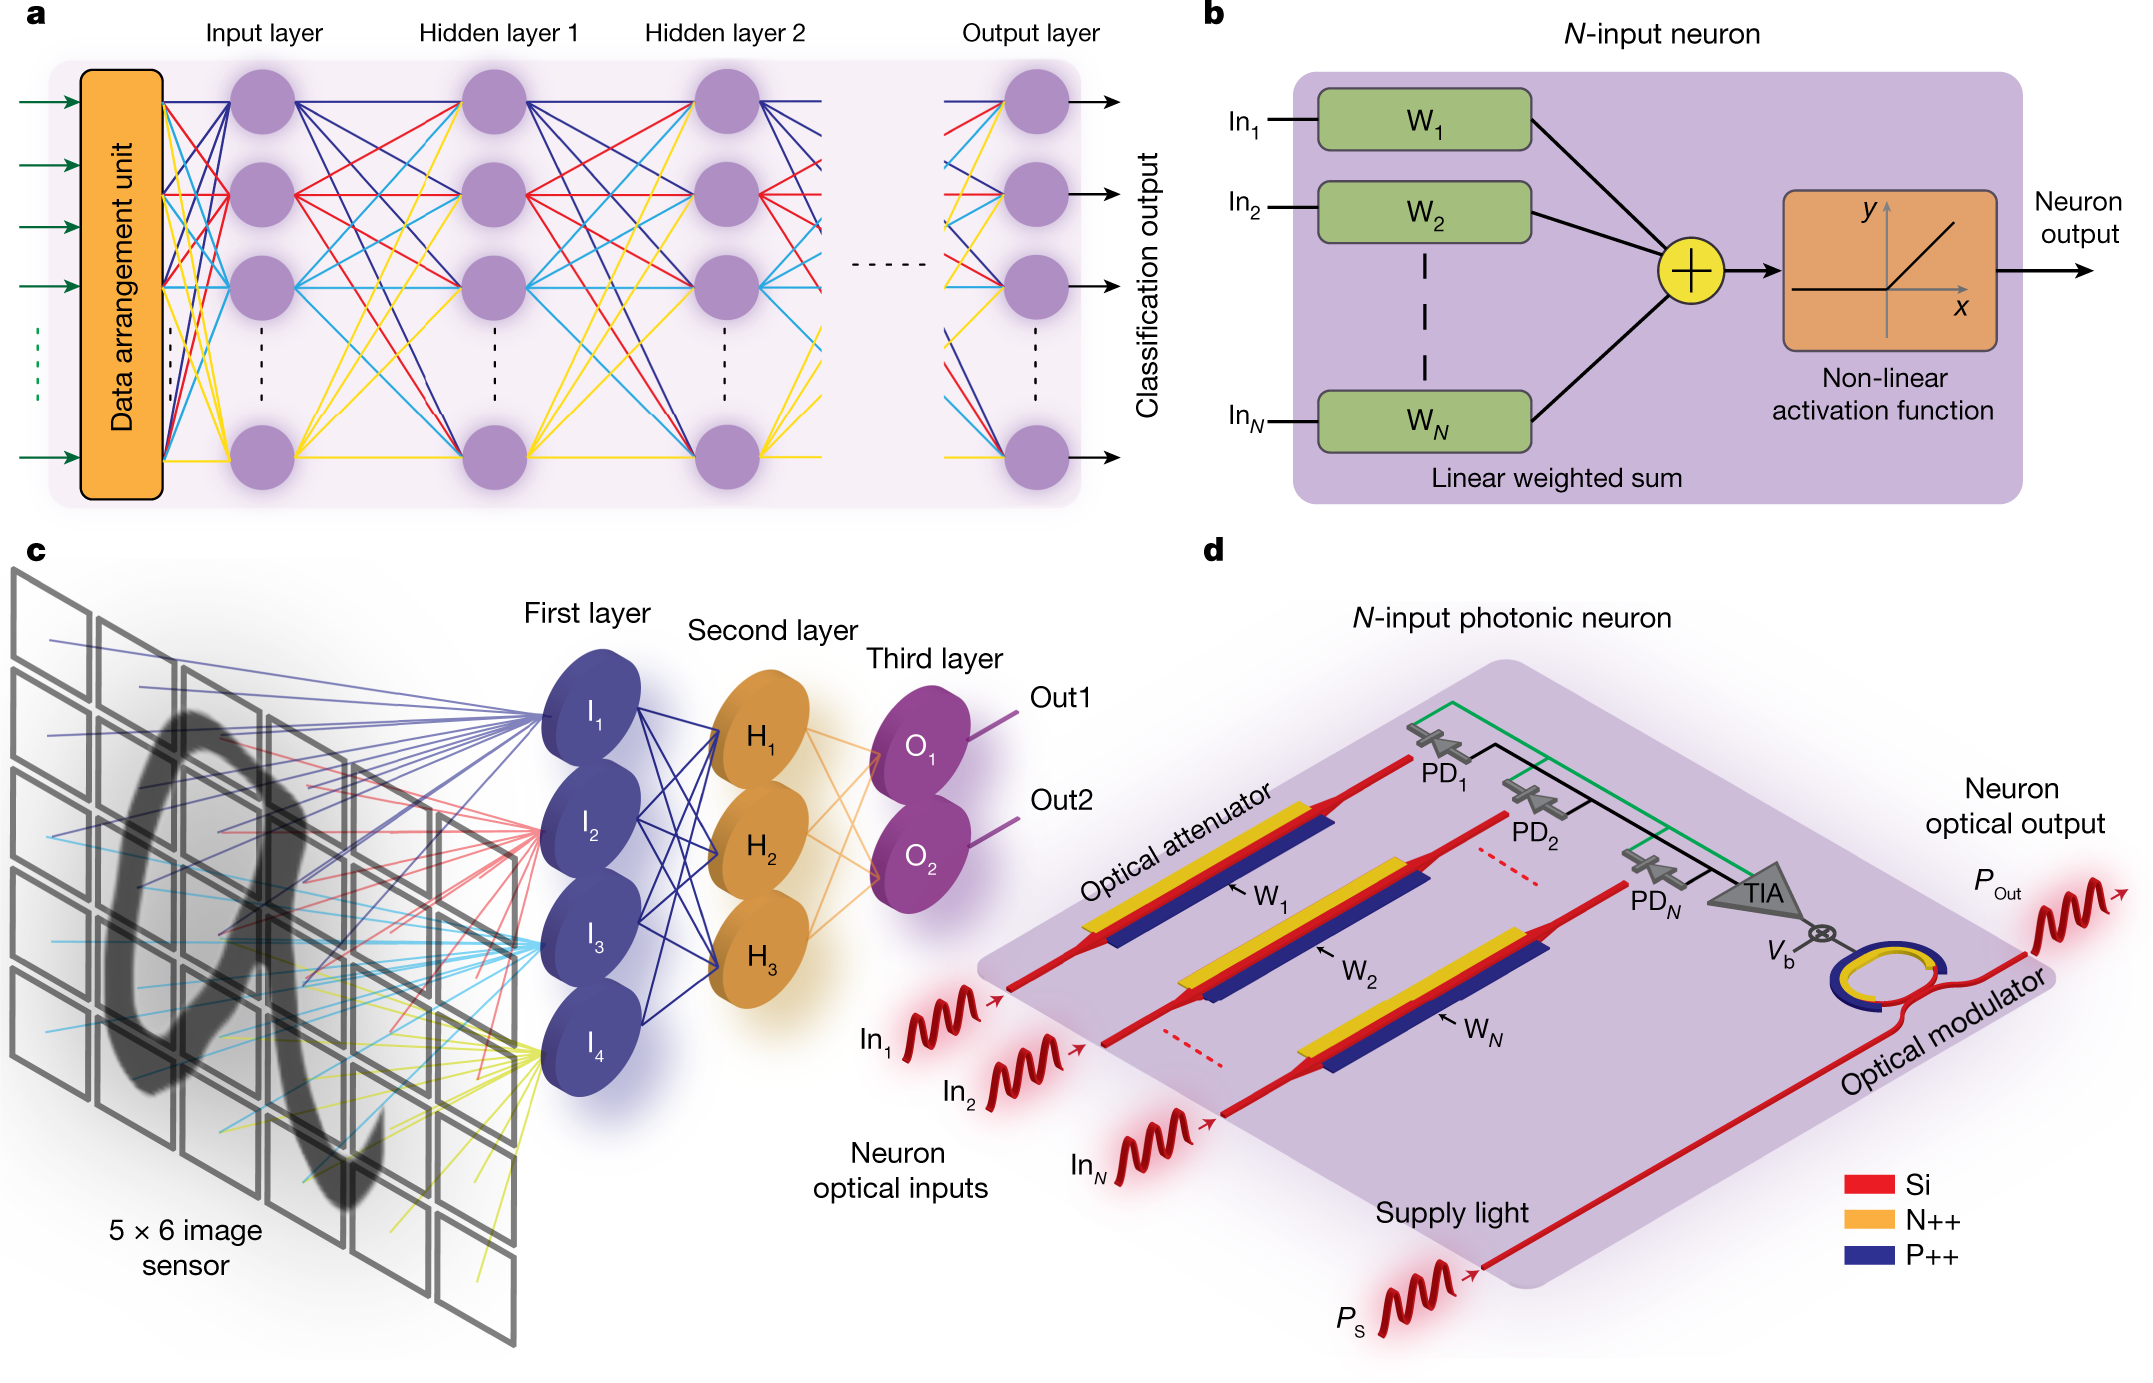

# ***Running NeuralProphet***

# STEP 1: Install Libraries

In [1]:
!pip install numpy==1.23.5
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.9.0 requires numpy<2.0.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [2]:
# %pip install numpy==1.24.4


### Import installed libraries

In [1]:
from neuralprophet import NeuralProphet
# set_log_level("ERROR")

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#STEP 2: Basic NeuralProphet on Test Data

In [3]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "wp_log_peyton_manning.csv", dayfirst=True)

In [ ]:
df

# Create NeuralProphet

In [ ]:
# epochs - how many generations to learn
example_model = NeuralProphet(quantiles=[0.02, 0.98], epochs=10)

# Model training - make sure that the frequency of the time series is correctly coded

In [ ]:
example_model_metrics = example_model.fit(df, freq="D", progress='plot-all')

In [ ]:
example_model_future = example_model.make_future_dataframe(df, periods=365, n_historic_predictions=True)

In [ ]:
example_model_forecast = example_model.predict(example_model_future)

In [ ]:
example_model_forecast

# Save forecast data to csv file

In [ ]:
example_model_forecast.to_csv('example_model_neuralprophet_forecast.csv')

# Use Plotly to show chart of forecasts: https://plotly.com/python/setting-graph-size/


In [ ]:
visual_example_model = example_model.plot(example_model_forecast)

In [ ]:
visual_example_model

In [ ]:
import plotly.express as px

In [ ]:
df_vis = example_model_forecast
fig = px.line(df_vis, x="ds", y="yhat1",
                 width=800, height=400)
fig

# ***Forecast on Project Data***

# Forecast Australian Inflation Rate

## Explaination about inflation: https://www.rba.gov.au/education/resources/explainers/inflation-and-its-measurement.html



# STEP 2: Load Data

In [ ]:
df = pd.read_csv('https://s3.ap-southeast-2.wasabisys.com/data5000/aus_cpi.csv', dayfirst=True)

In [ ]:
df

In [ ]:
df.info()

# STEP 3: Pre-process Time Series

In [ ]:
df.Date

### Convert Date String to True Datetimes

In [ ]:
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [ ]:
df.info()

### Make Date the Index of the Dataset

In [ ]:
df = df.set_index(df.Date)

In [ ]:
df

In [ ]:
data = df[['Date', 'AU-CPI']]
data

In [ ]:
data.rename(columns={"Date":"ds", "AU-CPI":"y"}, inplace=True)

In [ ]:
data

#STEP 4: Forecasting - Neural Network (NeuralProphet)

## Note: do not run the code immediately below - it is here only for reference on the parameters

In [ ]:
# DO NOT RUN - this is put here to show the parameters that are available for adjustment
class neuralprophet.forecaster.NeuralProphet(growth: Literal['off', 'linear', 'discontinuous'] = 'linear',
                                             changepoints: Optional[list] = None,
                                             n_changepoints: int = 10,
                                             changepoints_range: float = 0.8,
                                             trend_reg: float = 0,
                                             trend_reg_threshold: Optional[Union[bool, float]] = False,
                                             trend_global_local: str = 'global',
                                             yearly_seasonality: Union[Literal['auto'], bool, int] = 'auto',
                                             weekly_seasonality: Union[Literal['auto'], bool, int] = 'auto',
                                             daily_seasonality: Union[Literal['auto'], bool, int] = 'auto',
                                             seasonality_mode: Literal['additive', 'multiplicative'] = 'additive',
                                             seasonality_reg: float = 0, season_global_local: Literal['global', 'local'] = 'global',
                                             n_forecasts: int = 1,
                                             n_lags: int = 0,
                                             ar_layers: Optional[list] = [],
                                             ar_reg: Optional[float] = None,
                                             lagged_reg_layers: Optional[list] = [],
                                             learning_rate: Optional[float] = None,
                                             epochs: Optional[int] = None,
                                             batch_size: Optional[int] = None,
                                             loss_func: Union[str, torch.nn.modules.loss._Loss, Callable] = 'Huber',
                                             optimizer: Union[str, Type[torch.optim.optimizer.Optimizer]] = 'AdamW',
                                             newer_samples_weight: float = 2,
                                             newer_samples_start: float = 0.0,
                                             quantiles: List[float] = [],
                                             impute_missing: bool = True,
                                             impute_linear: int = 10,
                                             impute_rolling: int = 10,
                                             drop_missing: bool = False,
                                             collect_metrics: Union[List[str], bool, Dict[str, torchmetrics.metric.Metric]] = True,
                                             normalize: Literal['auto', 'soft', 'soft1', 'minmax', 'standardize', 'off'] = 'auto',
                                             global_normalization: bool = False,
                                             global_time_normalization: bool = True,
                                             unknown_data_normalization: bool = False,
                                             accelerator: Optional[str] = None,
                                             trainer_config: dict = {},
                                             prediction_frequency: Optional[dict] = None)

### ADAM optimiser https://keras.io/api/optimizers/adam/

In [ ]:
aus_cpi_model = NeuralProphet(
    epochs = 100,
    loss_func = "Huber",
    optimizer = "AdamW"
)

In [ ]:
# Use static plotly in notebooks
aus_cpi_model.set_plotting_backend("plotly-static")

### Split data into training and validation

In [ ]:
# note the code for the frequency of the time series
df_train, df_val = aus_cpi_model.split_df(data, valid_p = 0.20, freq='Q')

In [ ]:
df_train

In [ ]:
# plot
fig_df_train = px.line(df_train, x="ds", y="y",
                 width=800, height=400)
fig_df_train

# Validation data is used by NeuralProphet to measure its performance and make adjustments to parameters.

In [ ]:
df_val

### Training

In [ ]:
aus_cpi_metrics = aus_cpi_model.fit(df_train, validation_df=df_val, progress='plot-all')

In [ ]:
aus_cpi_metrics

In [ ]:
aus_cpi_metrics.to_csv('aus_cpi_metrics.csv')

# Forecasting

## We shall forecast 2 quarters into the future

In [ ]:
aus_cpi_future_time = aus_cpi_model.make_future_dataframe(df=data, n_historic_predictions=True, periods=365)

In [ ]:
aus_cpi_future_time

In [ ]:
aus_cpi_forecast = aus_cpi_model.predict(df=aus_cpi_future_time)

In [ ]:
aus_cpi_forecast

In [ ]:
aus_cpi_forecast.to_csv('aus_cpi_forecast_neuralprophet.csv')

In [ ]:
aus_cpi_forecast_visual = aus_cpi_model.plot(aus_cpi_forecast)

In [ ]:
trends_seasons = aus_cpi_model.plot_components(aus_cpi_forecast)

# Using External Regressors - next time we perform causal analysis